### PASO 3: LIMPIEZA DE DATOS

En este paso seleccionaremos una de las industrias para examinarla y realizar la limpieza de datos. 
El objetivo consistirá en construir, finalmente, una fórmula la cual pueda limpiar todos los archivos de las diferentes industrias para su posterior estudio.

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
# Para evitar los avisos.
warnings.filterwarnings('ignore') 
%matplotlib inline

In [224]:
#Leemos el archivo excel de la industria 'Healthcare'.
ruta = "C:/Users/carlos.guisado/Documents/Master/Master Kschool/TFM/Industrias/"
df = pd.read_excel(ruta + "Healthcare.xlsx")
df_ = df
df

,Company Name,Field Name,TRBC Industry Group,Market Capitalization,BookValue_per_share,EV/EBITDA,Pretax ROA,Pretax ROE,Return On Avg Tot Assets,Return On Avg Com Eq,...,Operating Margin - %,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
0,Agilent Technologies Inc (A),31-10-2019,Healthcare Equipment & Supplies,0.135045,-0.065034,0.051478,-0.083408,-0.019393,0.163245,0.245263,...,0.016851,0.174405,-0.558394,-0.534954,-0.168981,-0.612903,-0.029891,0.030340,-0.092025,-0.075325
1,Agilent Technologies Inc (A),31-10-2018,Healthcare Equipment & Supplies,-0.056677,0.045372,-0.149773,0.126263,0.136800,0.213523,0.224801,...,0.038272,0.154248,-0.038596,-0.003030,0.345794,-0.088235,-0.016043,0.018208,-0.087838,0.071826
2,Agilent Technologies Inc (A),31-10-2017,Healthcare Equipment & Supplies,0.549089,-0.128753,0.355453,0.390449,0.368136,0.393388,0.372157,...,0.171685,0.392175,-0.131098,-0.142857,-0.296053,-0.028571,0.002681,-0.004176,-0.074074,0.386873
3,Agilent Technologies Inc (A),31-10-2016,Healthcare Equipment & Supplies,0.129429,-0.041213,0.028118,0.356190,0.276407,0.263048,0.188108,...,0.109453,0.012903,0.018634,0.018519,0.394495,-0.027778,0.033241,-0.030516,-0.056000,0.089151
4,Agilent Technologies Inc (A),31-10-2015,Healthcare Equipment & Supplies,-0.321252,0.260438,-0.296480,1.464789,1.344907,1.217593,1.111872,...,0.217128,0.893543,0.102740,0.159509,-0.137203,0.028571,0.426877,-0.300932,0.813559,1.100707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,DENTSPLY SIRONA Inc (XRAY.O),31-12-2014,Healthcare Equipment & Supplies,0.090158,0.084709,0.042962,NaN,0.079085,0.048973,0.007576,...,0.066166,0.025046,0.415730,0.284722,0.315556,0.714286,-0.018405,0.018639,0.017242,0.105431
335,DENTSPLY SIRONA Inc (XRAY.O),31-12-2013,Healthcare Equipment & Supplies,0.230174,-0.131697,0.178458,NaN,-0.043750,-0.033588,-0.147837,...,0.053161,-0.009191,0.171053,0.200000,-0.064449,0.750000,-0.091922,0.099422,0.008475,0.108946
336,DENTSPLY SIRONA Inc (XRAY.O),31-12-2012,Healthcare Equipment & Supplies,0.135016,-0.159487,-0.108601,NaN,0.185185,0.059871,0.168175,...,0.049774,0.115897,-0.155556,-0.142857,-0.243711,-0.333333,-0.047745,0.050902,-0.008404,0.118930
337,DENTSPLY SIRONA Inc (XRAY.O),31-12-2011,Healthcare Equipment & Supplies,0.020084,-0.004869,0.128981,NaN,-0.279616,-0.266904,-0.083621,...,-0.247446,-0.190199,-0.677419,-0.616438,-0.043609,-0.793103,0.038567,-0.036438,-0.177967,-0.373292


In [171]:
#Limpieza de datos de los Ratios
df = df.drop(['Company Name', 'Field Name', 'TRBC Industry Group'], axis = 1)
df = df.dropna(axis = 0, how= "all")

### Paso 4: Análisis de correlación entre variables financieras

El objetivo de este paso es conocer qué ratios son los que tienen mayor relación con el incremento del valor de mercado de una empresa.

In [172]:
import statsmodels
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
#Calculamos el porcentaje de valores nulos por columna, y borramos aquellas columnas con más de un 15%
Ratios = df
total = Ratios.isnull().sum().sort_values(ascending = False)
percent = (Ratios.isnull().sum() / Ratios.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
Ratios = Ratios.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
Ratios

,Market Capitalization,EV/EBITDA,Pretax ROE,Tot Debt Pct of Tot Assets,Tot Debt Pct of Tot Eq,Tot Debt Pct of Tot Cap,Gross Profit Margin - %,EBITDA Margin - %,Operating Margin - %,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
0,0.135045,0.051478,-0.019393,0.209402,0.288110,0.191218,-0.002563,0.027468,0.016851,0.174405,-0.558394,-0.534954,-0.168981,-0.612903,-0.029891,0.030340,-0.092025,-0.075325
1,-0.056677,-0.149773,0.136800,-0.117721,-0.053619,-0.038475,0.018650,0.009532,0.038272,0.154248,-0.038596,-0.003030,0.345794,-0.088235,-0.016043,0.018208,-0.087838,0.071826
2,0.549089,0.355453,0.368136,-0.022923,-0.072480,-0.051357,0.024064,0.073988,0.171685,0.392175,-0.131098,-0.142857,-0.296053,-0.028571,0.002681,-0.004176,-0.074074,0.386873
3,0.129429,0.028118,0.276407,0.103931,0.129756,0.089757,0.045110,0.055501,0.109453,0.012903,0.018634,0.018519,0.394495,-0.027778,0.033241,-0.030516,-0.056000,0.089151
4,-0.321252,-0.296480,1.344907,0.438882,0.266029,0.190197,0.026429,-0.032779,0.217128,0.893543,0.102740,0.159509,-0.137203,0.028571,0.426877,-0.300932,0.813559,1.100707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.130232,0.176382,-0.142944,-0.035714,-0.092933,-0.062198,0.036354,0.049900,0.052463,-0.150226,0.428571,0.356757,-0.170608,0.333333,-0.006250,0.007354,0.017544,-0.109104
334,0.090158,0.042962,0.079085,-0.065703,-0.050995,-0.032958,0.023943,0.055292,0.066166,0.025046,0.415730,0.284722,0.315556,0.714286,-0.018405,0.018639,0.017242,0.105431
335,0.230174,0.178458,-0.043750,-0.049689,-0.153209,-0.097422,0.005833,0.036007,0.053161,-0.009191,0.171053,0.200000,-0.064449,0.750000,-0.091922,0.099422,0.008475,0.108946
336,0.135016,-0.108601,0.185185,-0.176581,-0.278874,-0.166357,0.059187,0.103552,0.049774,0.115897,-0.155556,-0.142857,-0.243711,-0.333333,-0.047745,0.050902,-0.008404,0.118930


In [174]:
#Una vez tenemos todos los datos, analizamos la correlación de "Market Capitalization" con cada uno de ellos.
df_corr = Ratios.corr('pearson')
df_corr = df_corr['Market Capitalization']
df_corr

Market Capitalization         1.000000
EV/EBITDA                     0.979891
Pretax ROE                    0.023336
Tot Debt Pct of Tot Assets   -0.029676
Tot Debt Pct of Tot Eq       -0.022635
Tot Debt Pct of Tot Cap      -0.030235
Gross Profit Margin - %       0.174009
EBITDA Margin - %             0.107203
Operating Margin - %          0.090582
Net Margin - %                0.069972
Quick Ratio                  -0.045211
Curr Ratio                   -0.058268
FOCF Yld                     -0.730498
Wkg Cap to Tot Assets        -0.007465
Invnt Turnover                0.002507
Avg Invnt Days               -0.018456
Tot_Assets_per_Employee      -0.274746
Inc Bef Taxes Margin - %      0.103089
Name: Market Capitalization, dtype: float64

Agunos de estos datos no tienen mucha lógica, por lo que nos induce a pensar que las variables financieras son dependientes entre si, y por lo tanto, no se puede hacer un análisis independiente de cada uno de los ratios.

Para demostrar nuestra hipótesis, analizaremos si existe correlación entre las variables utilizando matshow.

In [175]:
corr = Ratios.corr()
corr

,Market Capitalization,EV/EBITDA,Pretax ROE,Tot Debt Pct of Tot Assets,Tot Debt Pct of Tot Eq,Tot Debt Pct of Tot Cap,Gross Profit Margin - %,EBITDA Margin - %,Operating Margin - %,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
Market Capitalization,1.000000,0.979891,0.023336,-0.029676,-0.022635,-0.030235,0.174009,0.107203,0.090582,0.069972,-0.045211,-0.058268,-0.730498,-0.007465,0.002507,-0.018456,-0.274746,0.103089
EV/EBITDA,0.979891,1.000000,0.007810,0.054422,0.058257,0.052950,0.140571,-0.238114,-0.257041,-0.001148,-0.021313,-0.059821,-0.720459,0.000253,-0.109107,0.123908,-0.088171,-0.042167
Pretax ROE,0.023336,0.007810,1.000000,-0.022869,-0.026122,-0.022543,0.005049,0.164245,0.143880,0.561273,-0.012994,-0.029146,-0.065467,-0.003411,0.086075,-0.090144,0.059133,0.838320
Tot Debt Pct of Tot Assets,-0.029676,0.054422,-0.022869,1.000000,0.996565,0.999541,-0.067684,-0.107430,-0.139970,-0.045151,-0.006878,-0.001331,0.212146,-0.029352,-0.012006,0.023798,-0.174265,-0.031056
Tot Debt Pct of Tot Eq,-0.022635,0.058257,-0.026122,0.996565,1.000000,0.995860,-0.068719,-0.106837,-0.140848,-0.048575,-0.008268,-0.003061,0.220484,-0.030327,-0.023483,0.031987,-0.182602,-0.034845
Tot Debt Pct of Tot Cap,-0.030235,0.052950,-0.022543,0.999541,0.995860,1.000000,-0.069724,-0.108594,-0.142769,-0.045153,-0.015307,-0.009454,0.192675,-0.032059,-0.010614,0.023104,-0.175526,-0.032574
Gross Profit Margin - %,0.174009,0.140571,0.005049,-0.067684,-0.068719,-0.069724,1.000000,0.095944,0.253862,-0.002822,0.064546,0.059761,-0.020711,0.015963,-0.059729,0.015852,0.074913,0.015068
EBITDA Margin - %,0.107203,-0.238114,0.164245,-0.107430,-0.106837,-0.108594,0.095944,1.000000,0.846751,-0.035413,0.106176,0.121263,-0.083323,0.059092,0.063266,-0.067563,0.076836,0.218414
Operating Margin - %,0.090582,-0.257041,0.143880,-0.139970,-0.140848,-0.142769,0.253862,0.846751,1.000000,0.010902,0.132709,0.146755,-0.077034,0.103274,0.073061,-0.107072,0.204722,0.191661
Net Margin - %,0.069972,-0.001148,0.561273,-0.045151,-0.048575,-0.045153,-0.002822,-0.035413,0.010902,1.000000,0.007492,0.010487,-0.209503,-0.010017,0.121708,-0.126025,0.079457,0.646415


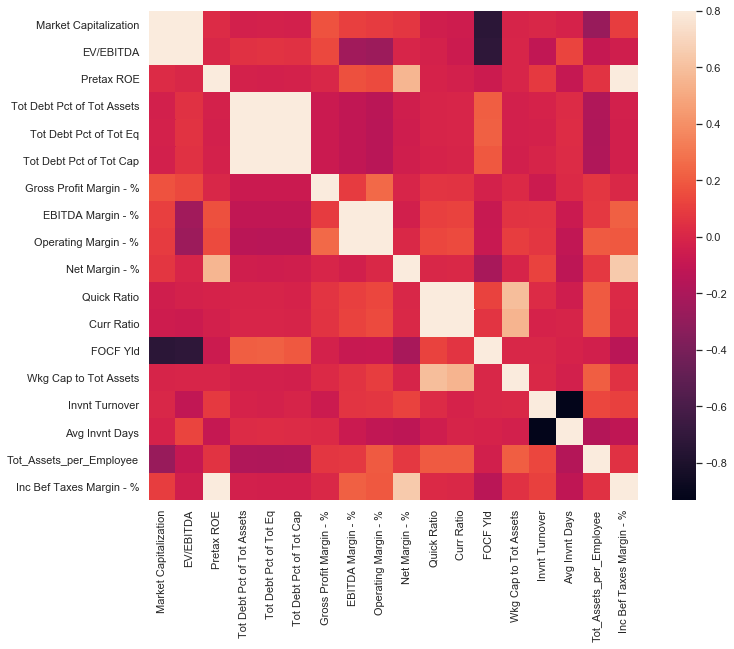

In [176]:
#Matriz de correlación entre variables
corrmat = Ratios.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = .8, square = True)

Como podemos ver a primera vista, muchas de nuestras variables son dependientes entre si, por lo que nos encontramos con un problema de milticolinealidad.

Para solucionarlo, calcularemos el factor de inflacion de la varianza (VIF) e iremos eliminando aquellas variables que son dependientes entre si y aportan la misma información.

In [210]:
cols = Ratios.columns.tolist()
#Se reemplazan los valores nulos por la media
for x in cols:
    Ratios[x] = Ratios[x].fillna(Ratios[x].mean())

In [211]:
Ratios

,EV/EBITDA,Pretax ROE,Tot Debt Pct of Tot Cap,Gross Profit Margin - %,EBITDA Margin - %,Operating Margin - %,Net Margin - %,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
0,0.051478,-0.019393,0.191218,-0.002563,0.027468,0.016851,0.174405,-0.534954,-0.168981,-0.612903,-0.029891,-0.092025,-0.075325
1,-0.149773,0.136800,-0.038475,0.018650,0.009532,0.038272,0.154248,-0.003030,0.345794,-0.088235,-0.016043,-0.087838,0.071826
2,0.355453,0.368136,-0.051357,0.024064,0.073988,0.171685,0.392175,-0.142857,-0.296053,-0.028571,0.002681,-0.074074,0.386873
3,0.028118,0.276407,0.089757,0.045110,0.055501,0.109453,0.012903,0.018519,0.394495,-0.027778,0.033241,-0.056000,0.089151
4,-0.296480,1.344907,0.190197,0.026429,-0.032779,0.217128,0.893543,0.159509,-0.137203,0.028571,0.426877,0.813559,1.100707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.176382,-0.142944,-0.062198,0.036354,0.049900,0.052463,-0.150226,0.356757,-0.170608,0.333333,-0.006250,0.017544,-0.109104
334,0.042962,0.079085,-0.032958,0.023943,0.055292,0.066166,0.025046,0.284722,0.315556,0.714286,-0.018405,0.017242,0.105431
335,0.178458,-0.043750,-0.097422,0.005833,0.036007,0.053161,-0.009191,0.200000,-0.064449,0.750000,-0.091922,0.008475,0.108946
336,-0.108601,0.185185,-0.166357,0.059187,0.103552,0.049774,0.115897,-0.142857,-0.243711,-0.333333,-0.047745,-0.008404,0.118930


In [178]:
#VIF
#Calcularemos el Factor de Inflación de Varianza para cada una de los ratios, con el fin de eliminar de nuestra ecuación
#aquellos que ofrezcan la misma información, con el objetivo de crear un modelo acertado.
Ratios_vif = Ratios
def calculate_vif(Ratios_vif):
    vif = pd.DataFrame()
    vif["Ratios"] = Ratios_vif.columns
    vif["VIF"] = [variance_inflation_factor(Ratios_vif.values, i) for i in range(Ratios_vif.shape[1])]    
    return(vif)
vif = calculate_vif(Ratios_vif)
while vif['VIF'][vif['VIF'] > 7].any():
    remove = vif.sort_values('VIF',ascending=0)['Ratios'][:1]
    Ratios_vif.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(Ratios_vif)
vif

,Ratios,VIF
0,EV/EBITDA,2.193838
1,Pretax ROE,3.316657
2,Tot Debt Pct of Tot Cap,1.087658
3,Gross Profit Margin - %,1.148304
4,EBITDA Margin - %,4.063231
5,Operating Margin - %,4.189935
6,Net Margin - %,1.920824
7,Curr Ratio,1.490788
8,FOCF Yld,2.252010
9,Wkg Cap to Tot Assets,1.477427


In [181]:
data = corr[['Market Capitalization']].sort_values(by = 'Market Capitalization',ascending = False)
data_corr = data["Market Capitalization"]
data_corr= data_corr.to_frame()
data_corr["Distance"] = data_corr["Market Capitalization"]
for i in range(0,len(data_corr)):
    if data_corr["Distance"][i] <0:
        data_corr["Distance"][i] = abs(data_corr["Distance"][i])

In [182]:
data_ = data_corr.sort_values("Distance", ascending = False)
data_ = data_.iloc[0:10]
data_

,Market Capitalization,Distance
Market Capitalization,1.000000,1.000000
EV/EBITDA,0.979891,0.979891
FOCF Yld,-0.730498,0.730498
Tot_Assets_per_Employee,-0.274746,0.274746
Gross Profit Margin - %,0.174009,0.174009
EBITDA Margin - %,0.107203,0.107203
Inc Bef Taxes Margin - %,0.103089,0.103089
Operating Margin - %,0.090582,0.090582
Net Margin - %,0.069972,0.069972
Curr Ratio,-0.058268,0.058268


In [183]:
#Ordenamos los ratios
ratios = corr
Ratios_corr = ratios[[data_.iloc[0].name, data_.iloc[1].name, data_.iloc[2].name, data_.iloc[3].name, data_.iloc[4].name, data_.iloc[5].name, data_.iloc[6].name, data_.iloc[7].name]]
filas = Ratios_corr.index.values
columnas = Ratios_corr.columns.values
result = [columnas for columnas in columnas if columnas in filas]
Ratios_corr[result].loc[result]

,Market Capitalization,EV/EBITDA,FOCF Yld,Tot_Assets_per_Employee,Gross Profit Margin - %,EBITDA Margin - %,Inc Bef Taxes Margin - %,Operating Margin - %
Market Capitalization,1.000000,0.979891,-0.730498,-0.274746,0.174009,0.107203,0.103089,0.090582
EV/EBITDA,0.979891,1.000000,-0.720459,-0.088171,0.140571,-0.238114,-0.042167,-0.257041
FOCF Yld,-0.730498,-0.720459,1.000000,-0.034538,-0.020711,-0.083323,-0.135888,-0.077034
Tot_Assets_per_Employee,-0.274746,-0.088171,-0.034538,1.000000,0.074913,0.076836,0.052803,0.204722
Gross Profit Margin - %,0.174009,0.140571,-0.020711,0.074913,1.000000,0.095944,0.015068,0.253862
EBITDA Margin - %,0.107203,-0.238114,-0.083323,0.076836,0.095944,1.000000,0.218414,0.846751
Inc Bef Taxes Margin - %,0.103089,-0.042167,-0.135888,0.052803,0.015068,0.218414,1.000000,0.191661
Operating Margin - %,0.090582,-0.257041,-0.077034,0.204722,0.253862,0.846751,0.191661,1.000000


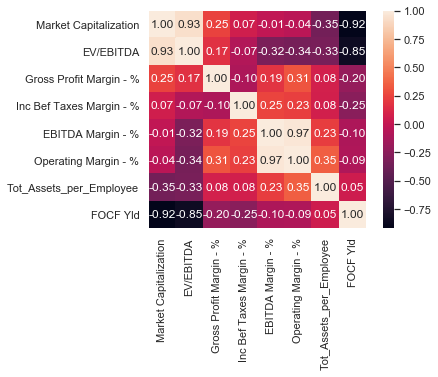

In [184]:
# Matriz de correlación
corrmat = Ratios_corr.corr()
k = 8 # Número de variables.
cols = corrmat.nlargest(k, 'Market Capitalization')['Market Capitalization'].index
cm = np.corrcoef(Ratios_corr[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 12}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

Una vez que ya disponemos de aquellas variables con una mayor correlación con la varianza del valor de mercado de la empresa, nos disponemos a crear nuestro modelo.

In [219]:
df_

,Company Name,Field Name,TRBC Industry Group,Market Capitalization,BookValue_per_share,EV/EBITDA,Pretax ROA,Pretax ROE,Return On Avg Tot Assets,Return On Avg Com Eq,...,Operating Margin - %,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
0,Agilent Technologies Inc (A),31-10-2019,Healthcare Equipment & Supplies,0.135045,-0.065034,0.051478,-0.083408,-0.019393,0.163245,0.245263,...,0.016851,0.174405,-0.558394,-0.534954,-0.168981,-0.612903,-0.029891,0.030340,-0.092025,-0.075325
1,Agilent Technologies Inc (A),31-10-2018,Healthcare Equipment & Supplies,-0.056677,0.045372,-0.149773,0.126263,0.136800,0.213523,0.224801,...,0.038272,0.154248,-0.038596,-0.003030,0.345794,-0.088235,-0.016043,0.018208,-0.087838,0.071826
2,Agilent Technologies Inc (A),31-10-2017,Healthcare Equipment & Supplies,0.549089,-0.128753,0.355453,0.390449,0.368136,0.393388,0.372157,...,0.171685,0.392175,-0.131098,-0.142857,-0.296053,-0.028571,0.002681,-0.004176,-0.074074,0.386873
3,Agilent Technologies Inc (A),31-10-2016,Healthcare Equipment & Supplies,0.129429,-0.041213,0.028118,0.356190,0.276407,0.263048,0.188108,...,0.109453,0.012903,0.018634,0.018519,0.394495,-0.027778,0.033241,-0.030516,-0.056000,0.089151
4,Agilent Technologies Inc (A),31-10-2015,Healthcare Equipment & Supplies,-0.321252,0.260438,-0.296480,1.464789,1.344907,1.217593,1.111872,...,0.217128,0.893543,0.102740,0.159509,-0.137203,0.028571,0.426877,-0.300932,0.813559,1.100707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,DENTSPLY SIRONA Inc (XRAY.O),31-12-2014,Healthcare Equipment & Supplies,0.090158,0.084709,0.042962,NaN,0.079085,0.048973,0.007576,...,0.066166,0.025046,0.415730,0.284722,0.315556,0.714286,-0.018405,0.018639,0.017242,0.105431
335,DENTSPLY SIRONA Inc (XRAY.O),31-12-2013,Healthcare Equipment & Supplies,0.230174,-0.131697,0.178458,NaN,-0.043750,-0.033588,-0.147837,...,0.053161,-0.009191,0.171053,0.200000,-0.064449,0.750000,-0.091922,0.099422,0.008475,0.108946
336,DENTSPLY SIRONA Inc (XRAY.O),31-12-2012,Healthcare Equipment & Supplies,0.135016,-0.159487,-0.108601,NaN,0.185185,0.059871,0.168175,...,0.049774,0.115897,-0.155556,-0.142857,-0.243711,-0.333333,-0.047745,0.050902,-0.008404,0.118930
337,DENTSPLY SIRONA Inc (XRAY.O),31-12-2011,Healthcare Equipment & Supplies,0.020084,-0.004869,0.128981,NaN,-0.279616,-0.266904,-0.083621,...,-0.247446,-0.190199,-0.677419,-0.616438,-0.043609,-0.793103,0.038567,-0.036438,-0.177967,-0.373292


In [204]:
#Análisis Industria
#Reemplazamos los valores nulos por la media del total y sacamos graficos de cómo ha ido evolucionando cada ratio.
df_analysis = df_
df_rt = pd.DataFrame()
for i in range (2010,2020):
    df_analysis = df_[df_["Field Name"].str.endswith(str(i))]
    col = df_analysis.columns.values.tolist()
    df_analysis = df_analysis.drop(['Company Name', 'TRBC Industry Group','Field Name'], axis = 1)
    cols = df_analysis.columns.tolist()
    #Se reemplazan los valores nulos por la media
    for x in cols:
        df_analysis[x] = df_analysis[x].fillna(df_analysis[x].mean())
    #Calculamos el porcentaje de valores nulos por columna, y borramos aquellas columnas con más de un 12%
    total = df_analysis.isnull().sum().sort_values(ascending = False)
    percent = (df_analysis.isnull().sum() / df_analysis.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    df_analysis = df_analysis.drop((missing_data[missing_data['Percent'] > 0.12]).index,1)
    #Se sacan los datos estadísticos
    df_analysis = pd.DataFrame(df_analysis.describe())
    df_analysis = df_analysis[1:]
    df_analysis = pd.DataFrame(df_analysis.iloc[0])
    df_analysis = df_analysis.transpose().rename(index={'mean': i})
    df_rt = pd.concat([df_rt, df_analysis], axis = 0)
    
df_rt

,Market Capitalization,BookValue_per_share,EV/EBITDA,Pretax ROE,Return On Avg Tot Assets,Return On Avg Com Eq,Tot Debt Pct of Tot Assets,Tot Debt Pct of Tot Eq,Tot Debt Pct of Tot Cap,Gross Profit Margin - %,...,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %,Pretax ROA
2010,-0.614224,0.770579,-0.359299,1.776296,1.773026,1.809709,0.125225,0.137025,0.103731,-0.053571,...,0.843798,0.937500,0.815920,0.654229,1.416667,0.130841,-0.116491,0.567011,0.878646,NaN
2011,0.053171,-0.096623,0.011293,-0.269093,-0.020952,-0.015872,0.192927,0.321221,0.198754,0.001433,...,-0.053602,-0.001760,-0.009029,0.712354,-0.094808,-0.021592,0.043844,-0.079939,-0.258316,0.376250
2012,0.120190,-0.042429,0.032895,-0.354154,-0.506492,-0.524711,0.141063,0.259051,0.151056,0.010654,...,-0.413609,0.088695,0.086349,0.229413,0.029435,-0.033113,0.051443,-0.051719,-0.325374,-0.032698
2013,0.359896,-0.050151,0.495371,0.213899,0.199872,0.413204,2.867050,4.384584,2.676553,0.005003,...,0.422577,0.041367,0.030992,-0.247583,0.335268,-0.019094,0.053400,-0.058583,-0.012181,-0.740845
2014,0.180778,0.088812,0.166625,0.020409,-0.166688,-0.114513,0.159615,0.530074,0.171992,0.002487,...,-0.109957,-0.048719,-0.051506,0.003837,-0.112355,0.008036,0.012203,-0.063483,-0.043875,-0.228261
2015,0.151178,0.027256,0.107993,0.793910,0.380154,1.042213,0.096509,0.318582,0.088068,0.000234,...,0.353650,0.003926,0.010567,-0.137254,0.015163,-0.009003,0.032449,-0.046932,0.168716,1.464789
2016,0.117582,-0.125420,-0.076927,0.366726,0.062877,-0.134114,0.188702,0.243257,0.168999,-0.004404,...,-0.099392,0.069511,0.060124,0.292930,0.099964,0.089944,-0.058588,-0.092409,0.343072,0.356190
2017,0.234660,-0.045134,0.202221,-0.138384,-0.269309,-0.287259,0.767841,1.274408,0.671898,0.002764,...,-0.261683,0.006171,0.003146,1.460087,0.035538,-0.007552,0.023430,-0.069290,-0.158922,0.390449
2018,0.114084,-0.005717,-0.064594,-0.419393,-0.561394,-0.785322,-0.063192,-0.000784,-0.069459,-0.003060,...,-0.433816,0.016744,0.018323,0.554211,0.054336,-0.004166,0.013081,-0.051339,-0.348163,0.126263
2019,0.209798,-0.053854,0.055571,-0.212356,-0.170077,-0.141658,0.733381,0.951606,0.747609,0.005209,...,-0.168184,0.135146,0.112030,-0.209583,0.153641,-0.019465,0.033361,-0.054679,-0.252534,-0.083408


In [207]:
#Análisis Industria del año 2019:
#Guardamos la variable final para estudiarla junto con la empresa que queramos
#Reemplazamos los valores nulos por la media del total del año 2019
df_analysis_2019 = df_
df_analysis_2019 = df_analysis_2019[df_analysis_2019["Field Name"].str.contains("2019")]
#CDefinimos variable con una lista de las columnas
col = df_analysis_2019.columns.values.tolist()
#Definimos los filtros que no queremos en el dataset
df_analysis_2019 = df_analysis_2019.drop(['Company Name', 'TRBC Industry Group','Field Name'], axis = 1)
#Reemplazamos valores nulos por la media
cols = df_analysis_2019.columns.tolist()
for i in cols:
    df_analysis_2019[i] = df_analysis_2019[i].fillna(df_analysis_2019[i].mean())
df_analysis_2019 = df_analysis_2019.describe()
df_analysis_2019 = df_analysis_2019[1:]
df_2019_industria = pd.DataFrame(df_analysis_2019.iloc[0])
df_2019_industria = df_2019_industria.transpose().rename(index={'mean': "2019"})
df_2019_industria

,Market Capitalization,BookValue_per_share,EV/EBITDA,Pretax ROA,Pretax ROE,Return On Avg Tot Assets,Return On Avg Com Eq,Tot Debt Pct of Tot Assets,Tot Debt Pct of Tot Eq,Tot Debt Pct of Tot Cap,...,Operating Margin - %,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
2019,0.209798,-0.053854,0.055571,-0.083408,-0.212356,-0.170077,-0.141658,0.733381,0.951606,0.747609,...,-0.058068,-0.168184,0.135146,0.11203,-0.209583,0.153641,-0.019465,0.033361,-0.054679,-0.252534


Ahora vamos a ver, en forma gráfica, como han ido evolucionando la media de estos ratios a lo largo de los últimos años.



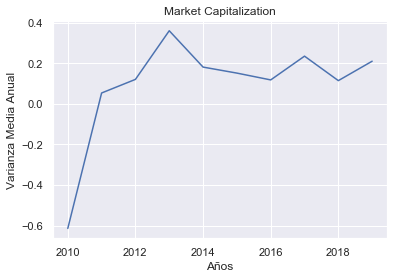

None


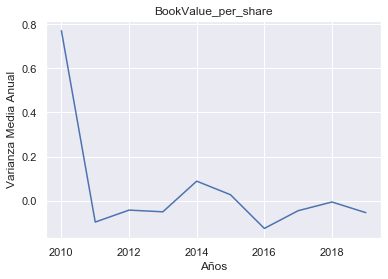

None


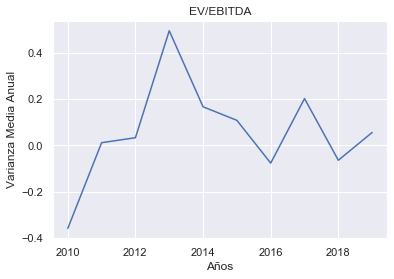

None


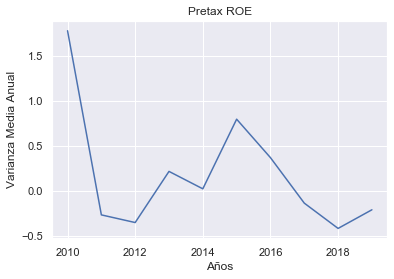

None


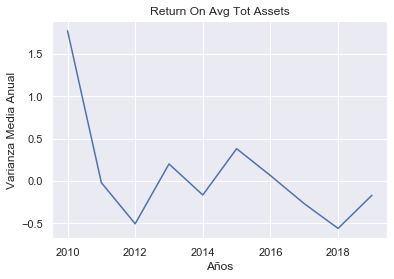

None


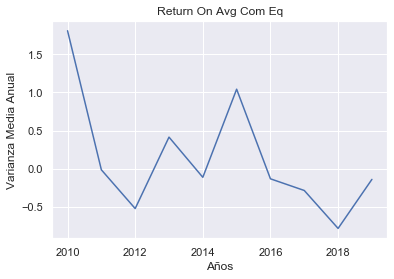

None


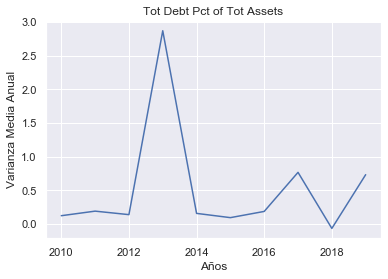

None


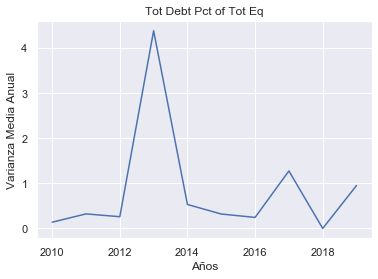

None


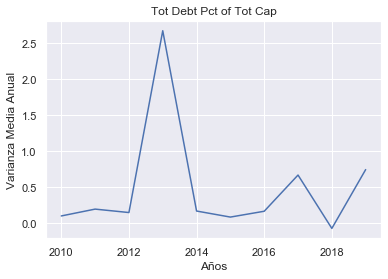

None


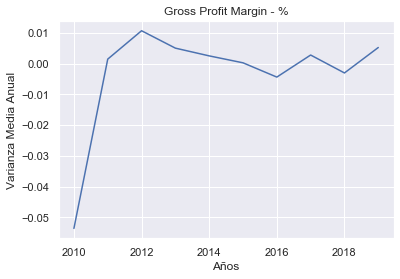

None


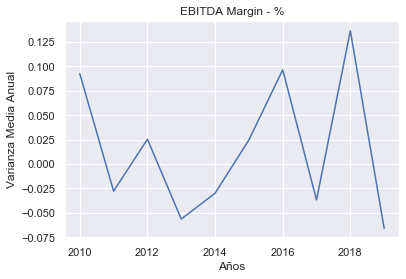

None


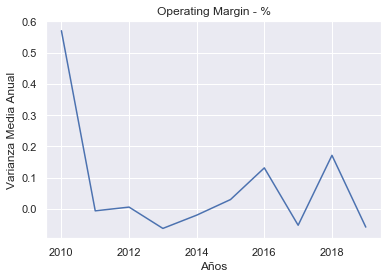

None


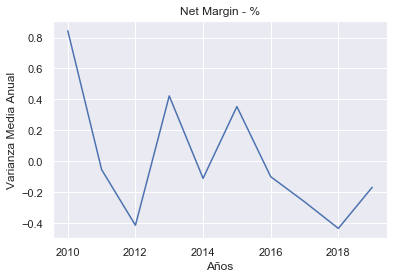

None


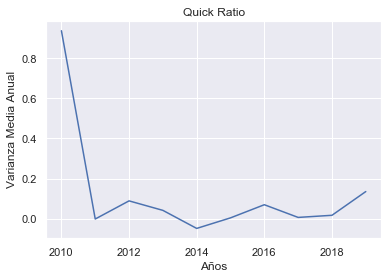

None


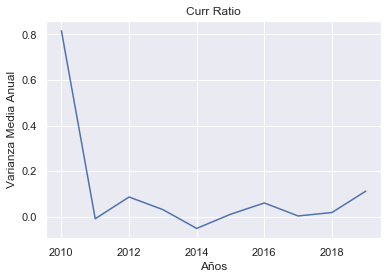

None


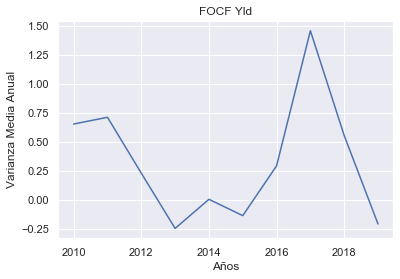

None


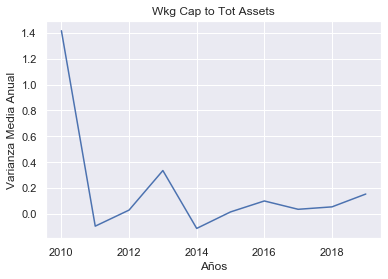

None


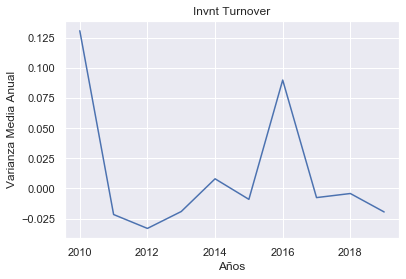

None


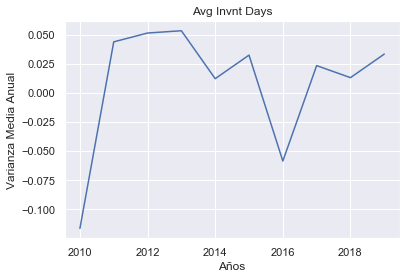

None


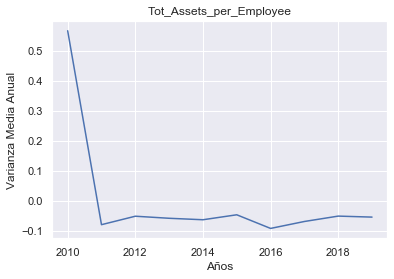

None


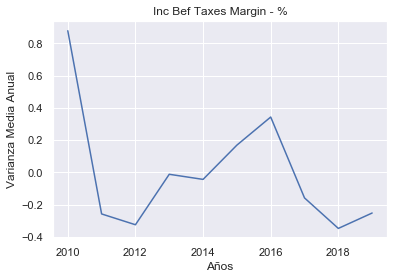

None


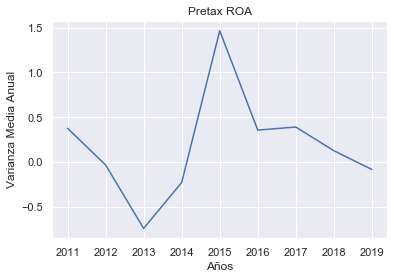

None


In [209]:
#Representación gráfica con plots
print("Ahora vamos a ver, en forma gráfica, como han ido evolucionando la media de estos ratios a lo largo de los últimos años.")
print()       
cols = df_rt.columns.values.tolist()
for i in range(0,len(df_rt.columns)):
    df_rt[cols[i]].plot()
    plt.xlabel("Años")
    plt.ylabel("Varianza Media Anual")
    plt.title(str(df_rt[cols[i]].name))
    print(plt.show())

### Paso 5: Modelo predictivo

El objetivo de este paso es crear un modelo que sea eficaz a la hora de predecir la variación en el "Market Capitalization" dados unas variaciones dadas de sus ratios financieros.
Nuestro dataset será el creado en el paso 4a, "Ratios".

In [214]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import statsmodels.api as svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pandas as pd
import numpy as np

In [258]:
#Preparamos el dataset
ruta = "C:/Users/carlos.guisado/Documents/Master/Master Kschool/TFM/Industrias/"
df = pd.read_excel(ruta + "Healthcare.xlsx")
#Limpieza de datos
df = df.drop(['Company Name', 'Field Name', 'TRBC Industry Group'], axis = 1)
df = df.dropna(axis = 0, how= "all")
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
df = df.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
cols = df.columns.tolist()
#Se reemplazan los valores nulos por la media
for x in cols:
    df[x] = df[x].fillna(df[x].mean())
lista = df.columns.values.tolist()
for i in lista:
    df[i].replace(np.inf,0,inplace=True)
    df[i].replace(-np.inf,0,inplace=True)
df

,Market Capitalization,EV/EBITDA,Pretax ROE,Tot Debt Pct of Tot Assets,Tot Debt Pct of Tot Eq,Tot Debt Pct of Tot Cap,Gross Profit Margin - %,EBITDA Margin - %,Operating Margin - %,Net Margin - %,Quick Ratio,Curr Ratio,FOCF Yld,Wkg Cap to Tot Assets,Invnt Turnover,Avg Invnt Days,Tot_Assets_per_Employee,Inc Bef Taxes Margin - %
0,0.135045,0.051478,-0.019393,0.209402,0.288110,0.191218,-0.002563,0.027468,0.016851,0.174405,-0.558394,-0.534954,-0.168981,-0.612903,-0.029891,0.030340,-0.092025,-0.075325
1,-0.056677,-0.149773,0.136800,-0.117721,-0.053619,-0.038475,0.018650,0.009532,0.038272,0.154248,-0.038596,-0.003030,0.345794,-0.088235,-0.016043,0.018208,-0.087838,0.071826
2,0.549089,0.355453,0.368136,-0.022923,-0.072480,-0.051357,0.024064,0.073988,0.171685,0.392175,-0.131098,-0.142857,-0.296053,-0.028571,0.002681,-0.004176,-0.074074,0.386873
3,0.129429,0.028118,0.276407,0.103931,0.129756,0.089757,0.045110,0.055501,0.109453,0.012903,0.018634,0.018519,0.394495,-0.027778,0.033241,-0.030516,-0.056000,0.089151
4,-0.321252,-0.296480,1.344907,0.438882,0.266029,0.190197,0.026429,-0.032779,0.217128,0.893543,0.102740,0.159509,-0.137203,0.028571,0.426877,-0.300932,0.813559,1.100707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.130232,0.176382,-0.142944,-0.035714,-0.092933,-0.062198,0.036354,0.049900,0.052463,-0.150226,0.428571,0.356757,-0.170608,0.333333,-0.006250,0.007354,0.017544,-0.109104
334,0.090158,0.042962,0.079085,-0.065703,-0.050995,-0.032958,0.023943,0.055292,0.066166,0.025046,0.415730,0.284722,0.315556,0.714286,-0.018405,0.018639,0.017242,0.105431
335,0.230174,0.178458,-0.043750,-0.049689,-0.153209,-0.097422,0.005833,0.036007,0.053161,-0.009191,0.171053,0.200000,-0.064449,0.750000,-0.091922,0.099422,0.008475,0.108946
336,0.135016,-0.108601,0.185185,-0.176581,-0.278874,-0.166357,0.059187,0.103552,0.049774,0.115897,-0.155556,-0.142857,-0.243711,-0.333333,-0.047745,0.050902,-0.008404,0.118930


In [259]:
Ratios = df

In [260]:
#Regresión Múltiple con Scikit - learn
data = Ratios
feature_cols = Ratios_corr.columns[1:]
X = data[feature_cols]
y = data["Market Capitalization"]

estimator = SVR(kernel ='linear')
selector = RFE(estimator, 6, step = 1)
selector= selector.fit(X,y)
selector.ranking_

lista = []
for i in range(0,len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        lista.append(i)
        
X_pred = X[X.columns[lista]]
nom_vars = X[X.columns[lista]]

lm = LinearRegression()
lm.fit(X_pred,y)


print ("Las variables con mayor correlación con la varianza en el precio de mercado son las siguientes: " + str(nom_vars.columns.values.tolist()))
print ( "El punto de intersección es el " + str(lm.intercept_))
print("Los coeficientes de cada una de las variables son " + str(lm.coef_))
print("La puntuación de este modelo es de " + str(lm.score(X_pred,y)))

Las variables con mayor correlación con la varianza en el precio de mercado son las siguientes: ['EV/EBITDA', 'FOCF Yld', 'Tot_Assets_per_Employee', 'Gross Profit Margin - %', 'EBITDA Margin - %', 'Operating Margin - %']
El punto de intersección es el -0.21997025064727438
Los coeficientes de cada una de las variables son [ 3.90651977e+00 -5.79585138e-02 -1.94192963e-01 -7.01653574e+00
 -5.90323702e-03  1.64559290e+00]
La puntuación de este modelo es de 0.9654662541353917


In [230]:
#Regresión Polinomial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#Definimos las variables
feature_cols = Ratios_corr.columns[1:]
x = data[feature_cols]
y = data["Market Capitalization"]

for i in range(1,100):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
    poli_reg = PolynomialFeatures(degree = 2)

    #Transformamos las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Definimos el algoritmo a utilizar
    pr = LinearRegression()

    #Entrenamos del modelo
    pr.fit(X_train_poli, y_train)

    #Realizamos nuestra predicción
    Y_pred_pr = pr.predict(X_test_poli)

    #Datos del modelo
    scoring = pr.score(X_train_poli, y_train)  

    if scoring > 0.75:
        print("random state: " + str(i))
        print('Valor de la pendiente: ' + str (pr.coef_))
        print( "Valor de la intersección: " + str(pr.intercept_))
        print ("Precisión del modelo: " + str(pr.score(X_train_poli, y_train)))
        break


random state: 1
Valor de la pendiente: [-1.56371221e+10  9.90674907e-01 -1.34909048e-02 -6.36371119e-01
 -6.78375013e-01  1.47928821e+00 -3.73912974e-02 -1.94017878e-02
  1.92190022e-02 -3.73321315e-02 -7.11908482e-01 -2.43367216e-01
 -6.37239502e-01  1.26192724e-01  1.68162051e+00 -1.87642510e-03
 -2.11633209e-01 -5.26016300e-01 -4.78934260e-01 -5.50838240e-03
  3.26921271e-01  3.48750684e-01 -3.50642722e+00  1.34498176e+00
 -4.75529564e-01  6.94591293e-01  9.48640242e-01 -3.18261651e+00
 -2.36270672e-01  3.61315608e+00 -9.61005598e-01  4.48518843e-01
  1.79492602e+00 -6.73479263e-03 -5.00382920e-02 -7.79583384e-01]
Valor de la intersección: 15637122124.172352
Precisión del modelo: 0.9998016670344987


In [231]:
#Regresión Logística
dataset = Ratios
feature_cols = Ratios.columns[1:]
X = data[feature_cols]
y = data[["Market Capitalization"]]>0


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Este modelo tiene una precisión del " + str(classifier.score(X,y)))
        

Este modelo tiene una precisión del 0.7549019607843137


In [232]:
#Regresión Logística 2
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

#
dataframe = Ratios

#Creamos el Modelo de Regresión Logística
feature_cols = Ratios.columns[1:]
X = dataset[feature_cols]
y = dataset[["Market Capitalization"]]>0

#creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.
model = linear_model.LogisticRegression()
model.fit(X,y)

#Clasificar nuestro conjunto de entradas X  y revisamos algunas de sus salidas 
predictions = model.predict(X)
#print(predictions)[0:5]

# Precision 
model.score(X,y)

#Validación de nuestro modelo
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,y, test_size = validation_size, random_state = seed)

# calculamos el nuevo scoring
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

#Predicciones 
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

#Reporte de Resultados del Modelo
print(confusion_matrix(Y_validation, predictions))

#Reporte de clasificación
print(classification_report(Y_validation, predictions))

Logistic Regression: 0.774667 (0.070969)
0.8064516129032258
[[ 7 11]
 [ 1 43]]
              precision    recall  f1-score   support

       False       0.88      0.39      0.54        18
        True       0.80      0.98      0.88        44

    accuracy                           0.81        62
   macro avg       0.84      0.68      0.71        62
weighted avg       0.82      0.81      0.78        62



In [234]:
#Arboles de Decisión
import pandas as pd
import matplotlib.pyplot as plt

data = Ratios
data['Market Capitalization'] = data["Market Capitalization"]>0

colnames = data.columns.values.tolist()
predictors = colnames[1:]
target = colnames[0]

for i in range(0,100):
    data['is_train'] = np.random.uniform(-1,1,len(data))<=0
    train,test = data[data['is_train']==True], data[data['is_train']==False]

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', min_samples_split = 20, random_state = i)
    tree.fit(train[predictors], train[target])

    preds = tree.predict(test[predictors])
    pd.crosstab(test[target], preds, rownames = ["Actual"], colnames=["Predictions"])

    #Resultado de nuestro modelo
    scoring = tree.score(test[predictors], test[target])
    
    if scoring>0.8:
        print("Random_state utilizado: " + str(i))
        print("Nuestro modelo tiene una precisión de: " + str(tree.score(test[predictors], test[target])))
        break

Random_state utilizado: 0
Nuestro modelo tiene una precisión de: 0.8053691275167785
